In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import phenom
from scrinet.interfaces import lalutils
import lal
import lalsimulation as lalsim

In [3]:
def match(h1, h2, times):

    dt = times[1] - times[0]
    n = len(times)
    df = 1.0/(n*dt)
    norm = 4. * df

    h1_fft = np.fft.fft(h1)
    h2_fft = np.fft.fft(h2)

    h1h1_sq = np.vdot(h1_fft, h1_fft) * norm
    h2h2_sq = np.vdot(h2_fft, h2_fft) * norm

    h1h1 = dt * np.sqrt(h1h1_sq)
    h2h2 = dt * np.sqrt(h2h2_sq)


    ifft = np.fft.ifft(np.conj(h1_fft) * h2_fft)

    return ifft / h1h1 / h2h2 * 4 * dt

In [4]:
import waveform1D as waveform

In [5]:
T800 = waveform.T800(q=1, mtotal=60, f_start=0.024, srate=0.01)

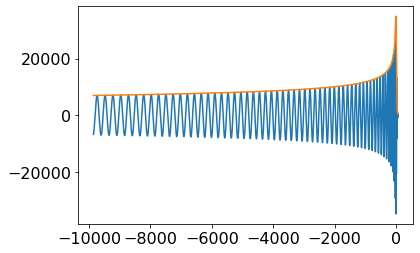

In [6]:
plt.figure()
plt.plot(T800.times, T800.h22.real)
plt.plot(T800.times, T800.amp)

In [24]:
# generate waveform from lal
q=2
mtotal=100
deltaT=1/1024.
f_min=10
approximant=lalsim.SEOBNRv4P
distance=1
t_min=-10000
t_max=100
npts=5000
m1, m2 = phenom.m1_m2_M_q(mtotal, q)
pp = dict(m1=m1, m2=m2, deltaT=deltaT,
    f_min=f_min,
    distance=distance,
    approximant=approximant
    )
p = lalutils.gen_td_modes_wf_params(**pp)

In [25]:
t, hlms = lalutils.gen_td_modes_wf(p, modes=[[2,2]])

t = phenom.StoM(t, mtotal)

h22 = hlms[(2,2)]

mask = (t >= t_min) & (t < t_max)
t = t[mask]
h22 = h22[mask]

t_s = phenom.MtoS(t, mtotal)

In [26]:
T800 = waveform.T800(q=q, mtotal=mtotal, times=t)

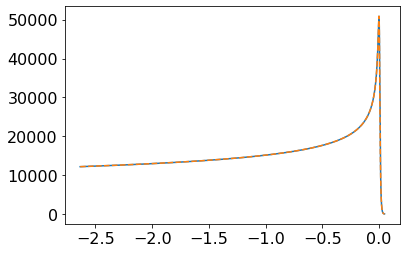

In [27]:
plt.figure()
plt.plot(t_s, np.abs(h22))
plt.plot(T800.times_s, T800.amp, ls='--')
plt.show()
plt.close()

# example match

In [28]:
np.max(np.abs(match(h22, T800.h22, t)))

0.9998846843212273